# Mission
Vous êtes consultant pour *Olist*, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

**Olist** souhaite que vous fournissiez à ses équipes d'e-commerce une **segmentation des clients** qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de **comprendre les différents types d’utilisateurs** grâce à leur comportement et à leurs données personnelles.

Vous devrez **fournir à l’équipe marketing une description actionable** de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une **proposition de contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps.

## Les données
Pour cette mission, Olist vous fournit une *base de données* anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

## Votre mission
Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

Vous créez donc un notebook et démarrez votre travail.
# Analyse exploratoire
## Import des librairies utilisées

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.impute import KNNImputer

## Paramétrages d'affichage

In [2]:
pd.set_option('display.max_column', 52)
sns.set_theme(style='whitegrid', palette='pastel')

## Import des datasets

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv',
                        encoding='utf-8')
geolocation = pd.read_csv('olist_geolocation_dataset.csv',
                          encoding='utf-8')
items = pd.read_csv('olist_order_items_dataset.csv',
                    encoding='utf-8')
payments = pd.read_csv('olist_order_payments_dataset.csv',
                       encoding='utf-8')
reviews = pd.read_csv('olist_order_reviews_dataset.csv',
                      encoding='utf-8')
orders = pd.read_csv('olist_orders_dataset.csv',
                     encoding='utf-8')
products = pd.read_csv('olist_products_dataset.csv',
                       encoding='utf-8')
sellers = pd.read_csv('olist_sellers_dataset.csv',
                      encoding='utf-8')
product_category_name_translation = pd.read_csv(
    'product_category_name_translation.csv',
    encoding='utf-8'
)

## Fusion des datasets

### Création d'un dictionnaire des datasets

In [4]:
datasets = {'customers': customers,
            'geolocation': geolocation,
            'orders': orders,
            'items': items,
            'payments': payments,
            'reviews': reviews,
            'products': products,
            'sellers': sellers,
            'product_category_name_translation':
            product_category_name_translation
            }

### Visualisation des dataframes et de leur structure

In [5]:
for name, dataset in datasets.items():
    print('-'*79)
    print('Affichage de la première ligne de "', name, '"')
    display(dataset.head(1))
    print('Le dataframe contient', dataset.shape[0], 'lignes et',
          dataset.shape[1], 'variables.\n')

-------------------------------------------------------------------------------
Affichage de la première ligne de " customers "


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


Le dataframe contient 99441 lignes et 5 variables.

-------------------------------------------------------------------------------
Affichage de la première ligne de " geolocation "


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


Le dataframe contient 1000163 lignes et 5 variables.

-------------------------------------------------------------------------------
Affichage de la première ligne de " orders "


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


Le dataframe contient 99441 lignes et 8 variables.

-------------------------------------------------------------------------------
Affichage de la première ligne de " items "


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


Le dataframe contient 112650 lignes et 7 variables.

-------------------------------------------------------------------------------
Affichage de la première ligne de " payments "


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


Le dataframe contient 103886 lignes et 5 variables.

-------------------------------------------------------------------------------
Affichage de la première ligne de " reviews "


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


Le dataframe contient 99224 lignes et 7 variables.

-------------------------------------------------------------------------------
Affichage de la première ligne de " products "


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


Le dataframe contient 32951 lignes et 9 variables.

-------------------------------------------------------------------------------
Affichage de la première ligne de " sellers "


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


Le dataframe contient 3095 lignes et 4 variables.

-------------------------------------------------------------------------------
Affichage de la première ligne de " product_category_name_translation "


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


Le dataframe contient 71 lignes et 2 variables.



### Création d'un dictionnaire des clés de fusion

In [6]:
join_on = {'items': 'order_id',
           'payments': 'order_id',
           'reviews': 'order_id',
           'orders': 'customer_id',
           'products': 'product_id',
           'sellers': 'seller_id',
           'product_category_name_translation': 'product_category_name'
           }

### Jointures des dataframes
L'objectif est la catégorisation des clients.

Dès lors, le dataframe contenant l'identifiant client unique est le point de départ des fusions.
#### Automatisation des fusions

In [7]:
def join_datasets(dict_datasets, dict_keys):
    """ Join several datasets according to personnalized key. """
    for name, dataset in dict_datasets.items():
        if name == 'customers':
            data = dataset
        elif name == 'geolocation':
            continue
        else:
            data = data.merge(dataset, on=dict_keys[name], how='left')
    print('5 lignes du dataframe final au hasard :')
    display(data.sample(5))
    print('Le dataframe contient', data.shape[0], 'lignes et',
          data.shape[1], 'variables.\n')
    return data

#### Application de la fonction

In [8]:
data = join_datasets(datasets, join_on)

5 lignes du dataframe final au hasard :


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
55422,04e0aae337a6d96f0b1311fe9ef13752,0d79252fffd1aab6f4221dfb4bc19aac,9320,maua,SP,4bb72dde289a979497e30c301beda3c4,delivered,2018-02-20 14:06:01,2018-02-20 14:15:43,2018-02-21 17:27:13,2018-02-22 18:45:27,2018-03-06 00:00:00,1.0,a12c9204f6f9e90ad1d8ba5571fbfed2,f262cbc1c910c83959f849465454ddd3,2018-02-26 14:15:43,29.99,8.72,1.0,credit_card,1.0,38.71,a912f9edb6d2f7eaa59ef5b97fd35d43,5.0,NaN,Muito bom,2018-02-23 00:00:00,2018-02-23 23:23:26,informatica_acessorios,31.0,614.0,2.0,600.0,19.0,13.0,20.0,3564.0,sao paulo,SP,computers_accessories
108227,c98e02708e14452ffd0cdd16b5842bf4,fa26d4d4d2760a32a7a7556b295f3c9c,1332,sao paulo,SP,5e01f3bd3366dac914df62787e0d3b3d,delivered,2018-01-11 15:20:50,2018-01-12 02:35:30,2018-01-13 01:44:55,2018-01-29 21:53:03,2018-02-08 00:00:00,1.0,173d5a1b6c4ea4f41aafca840646d240,06e5eefc71ec47ae763c5c6f8db7064f,2018-01-18 02:35:30,181.01,15.02,1.0,boleto,1.0,196.03,5ccc5d628f753cc19027605e90679019,4.0,NaN,NaN,2018-01-30 00:00:00,2018-01-31 17:08:01,informatica_acessorios,60.0,2442.0,4.0,100.0,16.0,16.0,16.0,91350.0,porto alegre,RS,computers_accessories
42522,5ea4f81504b4c78489a928f978001445,db6c2b8985bd08622c73917c51768866,15505,votuporanga,SP,1a68d6079c4fd25b3348fa2a03ac9579,delivered,2018-04-13 17:00:16,2018-04-14 02:13:44,2018-04-19 00:21:07,2018-04-20 17:32:42,2018-05-03 00:00:00,1.0,92503fc18ca14a8f32c182ce3f1b9f05,688756f717c462a206ad854c5027a64a,2018-04-20 02:13:44,21.00,12.79,1.0,boleto,1.0,33.79,a10d2d2acb242268b4a51bf23456e143,4.0,NaN,NaN,2018-04-21 00:00:00,2018-04-21 21:14:47,papelaria,59.0,140.0,2.0,3450.0,27.0,29.0,27.0,7094.0,guarulhos,SP,stationery
73515,af1fd846bda509c70e4fefbc3b1961bf,8187109cff1c32197ce4943e71f84360,87023,maringa,PR,8d99000d8edc9aa445a270e29e85fb05,delivered,2017-02-05 18:47:13,2017-02-05 19:01:53,2017-02-06 08:37:48,2017-02-15 13:13:50,2017-03-07 00:00:00,1.0,b000447e24e31a4d7e628ca4d0622131,92eb0f42c21942b6552362b9b114707d,2017-02-10 18:47:13,25.00,14.52,1.0,credit_card,1.0,39.52,6d504d2e91acbe41dcb9b57ad7834c00,1.0,NaN,"O fone não e a versão original da samsung, e a...",2017-02-16 00:00:00,2017-03-10 10:59:53,telefonia,33.0,119.0,1.0,250.0,19.0,4.0,11.0,3504.0,sao paulo,SP,telephony
21063,6dab4e63a2a40fef7c3cb46ab8083922,1270b69469b516c18f61138f16cda7aa,28895,rio das ostras,RJ,035da499656c96f8f1cf920dd57ddc49,delivered,2017-04-06 13:02:52,2017-04-06 13:10:45,2017-04-07 12:04:32,2017-04-18 15:56:50,2017-05-02 00:00:00,2.0,951cb45d30e716a846d8cf5874034e56,2138ccb85b11a4ec1e37afbd1c8eda1f,2017-04-12 13:10:45,18.99,14.52,1.0,credit_card,1.0,67.02,a89e4e5aa54127b4e7e9ca74880b7027,3.0,NaN,NaN,2017-04-19 00:00:00,2017-04-20 12:51:30,telefonia,57.0,524.0,1.0,150.0,18.0,3.0,12.0,8250.0,sao paulo,SP,telephony


Le dataframe contient 119143 lignes et 40 variables.



## Nettoyage des données
### Suppression variable traduite
La dernière fusion n'a fait qu'apporter la traduction en anglais de la catégorie de produit.

Je supprime la catégorie d'origine, en portugais.

In [9]:
data = data.drop(columns='product_category_name')
data.shape

(119143, 39)

### Observation des variables et leur type

In [10]:
data.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_t

Les dates sont au format *object*.
#### Transformation des dates en vraies dates

In [11]:
date_col = ['order_purchase_timestamp',
            'order_approved_at',
            'order_delivered_carrier_date',
            'order_delivered_customer_date',
            'order_estimated_delivery_date',
            'shipping_limit_date',
            'review_creation_date',
            'review_answer_timestamp'
            ]
for col in date_col:
    data[col] = pd.to_datetime(data[col],
                               format='%Y/%m/%d',
                               errors='coerce')

### Traitement des manquants
### Edit : je laisse cette partie non cleanée mais en fait, je ne réalise plus de traitement des manquants car je réaliserai plus tard une imputation avec KNNImputer
Dans l'optique de réaliser une **segmentation** marketing **RFM**, il n'est pas indispensable de nettoyer l'ensemble des features.
La priorité va à celles qui feront l'objet d'un export pour les modélisations.
#### Liste décroissante des variables manquantes

In [12]:
data.isna().mean().sort_values(ascending=False)

review_comment_title             0.882586
review_comment_message           0.578280
order_delivered_customer_date    0.028713
product_category_name_english    0.021546
product_photos_qty               0.021336
product_name_lenght              0.021336
product_description_lenght       0.021336
order_delivered_carrier_date     0.017508
review_score                     0.008368
review_id                        0.008368
review_creation_date             0.008368
review_answer_timestamp          0.008368
product_height_cm                0.007159
product_length_cm                0.007159
product_weight_g                 0.007159
product_width_cm                 0.007159
seller_zip_code_prefix           0.006992
seller_state                     0.006992
shipping_limit_date              0.006992
freight_value                    0.006992
price                            0.006992
seller_id                        0.006992
order_item_id                    0.006992
seller_city                      0

La feature *order_delivered_customer_date* est la numérique la moins bien remplie.

Pour notre étude, il est primordial de travailler sur les commandes dont le cycle est complet.

Je m'intéresse donc aux modalités de la variable *order_status*.

In [13]:
data['order_status'].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

Je ne conserve que les observations des commandes livrées.

In [14]:
# data = data.loc[data['order_status'] == 'delivered']
data.shape

(119143, 39)

Il reste encore des dates de livraison manquantes.

Quelles sont les observations concernées ?

In [15]:
data.loc[data['order_delivered_customer_date'].isna()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
52,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09,NaN,NaN,NaN,NaT,NaN,NaN,1.0,credit_card,1.0,73.16,e76cda681b681b65fffa28dfc0030641,1.0,NaN,Muita demora pra entregar e acima de tudo nao ...,2018-04-11,2018-04-11 13:17:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24,1.0,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35,1.0,boleto,1.0,143.25,f588cda1416895d04f9960ba794df07b,1.0,NaN,Comprei o produto fiz o pagamento na semana qu...,2018-05-27,2018-05-28 11:14:56,56.0,586.0,2.0,300.0,25.0,11.0,18.0,7402.0,aruja,SP,consoles_games
84,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20,1.0,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38,1.0,credit_card,1.0,74.38,614c979929f4c737a7b5034897a30267,3.0,NaN,"Não recebi o produto Ainda, mas aguardo recebe...",2018-02-22,2018-02-22 09:30:21,59.0,1972.0,4.0,300.0,69.0,11.0,11.0,80310.0,curitiba,PR,furniture_decor
95,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaT,2018-02-09,1.0,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61,1.0,voucher,1.0,137.60,b3e872bf70b6b54f82b468147ad1319d,1.0,NaN,Acho um desrespeito pediram pra buscar no corr...,2018-02-16,2018-02-16 14:53:08,NaN,NaN,NaN,400.0,20.0,12.0,15.0,7133.0,guarulhos,SP,NaN
119,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaT,2017-09-11,1.0,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69,1.0,credit_card,5.0,58.59,18a80894de129917815e652bde9bf45a,1.0,NaN,Fiz a compra e não entregou em minha casa. Fiz...,2017-09-13,2017-09-13 12:44:20,59.0,473.0,1.0,600.0,30.0,3.0,20.0,14940.0,ibitinga,SP,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118910,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,NaT,2018-08-02,1.0,41db6d8062fcd38410c699743ccc0265,92eb0f42c21942b6552362b9b114707d,2018-07-30 21:22:25,13.47,7.39,1.0,credit_card,1.0,20.86,291cd4cf382eaa53812b04a26d53288a,5.0,NaN,NaN,2018-08-05,2018-08-15 01:48:42,49.0,1438.0,2.0,125.0,19.0,5.0,11.0,3504.0,sao paulo,SP,telephony
118946,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,201

Vu le faible nombre (8), je supprime ces observations.

In [16]:
# data = data.loc[data['order_delivered_customer_date'].notna()]
data.shape

(119143, 39)

Les manquants sur les autres variables n'affectent pas celles qui peuvent m'intéresser pour les features engineering et modélisations à venir.
### Traitement des doublons
#### Moyens de paiement supplémentaires
Chaque moyen de paiement, en plus du premier, génère une ligne qu'il faut supprimer :

In [17]:
data = data.loc[~(data['payment_sequential'] > 1)]
data.shape

(114002, 39)

#### Doublons
Par construction, la variable *order_item_id* est incrémentale à l'intérieur d'une même commande *order_id*.
Il ne devrait pas être possible de trouver un dédoublement sur le même produit, ce qui arrive pourtant lorsqu'il y a plus d'un *payment_installments*.

In [18]:
data = data.loc[~(data.duplicated(
    subset=['order_id', 'order_item_id', 'product_id']))]
data.shape

(113335, 39)

### Traitement des outliers

In [19]:
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,113335.000000,112561.000000,112561.000000,112561.000000,113332.0,113332.000000,113332.000000,112375.000000,110961.000000,110961.00000,110961.000000,112543.000000,112543.000000,112543.000000,112543.000000,112561.000000
mean,35098.389659,1.197813,120.650235,19.986915,1.0,3.015697,177.721505,4.018216,48.775381,787.85895,2.209785,2093.633447,30.154501,16.593151,22.997272,24440.160446
std,29865.144072,0.705053,183.665827,15.804365,0.0,2.801963,272.380550,1.399207,10.026187,652.16104,1.721599,3751.909716,16.154470,13.443969,11.708689,27596.982363
min,1003.000000,1.000000,0.850000,0.000000,1.0,1.000000,0.000000,1.000000,5.000000,4.00000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11250.000000,1.000000,39.900000,13.080000,1.0,1.000000,64.000000,4.000000,42.000000,348.00000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24320.000000,1.000000,74.990000,16.260000,1.0,2.000000,112.400000,5.000000,52.000000,602.00000,1.000000,700.000000,25.000000,13.000000,20.000000,13568.000000
75%,59017.500000,1.000000,134.900000,21.150000,1.0,4.000000,193.382500,5.000000,57.000000,987.00000,3.000000,1800.000000,38.000000,20.000000,30.000000,27930.000000
max,99990.000000,21.000000,6735.000000,409.680000,1.0,24.000000,13664.080000,5.000000,76.000000,3992.00000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


Après visualisation des extrêmes sur les variables les plus intéressantes, il paraît **difficile de détecter les véritables valeurs aberrantes**, faute de connaître les produits précisément.
## Export du dataframe pour simulation de la fréquence de maintenance

In [20]:
data.to_csv("simulation.csv",
            columns=('order_purchase_timestamp',
                     'customer_unique_id',
                     'order_id',
                     'payment_value'),
            sep=',', index=False)

## Features engineering
La segmentation des clients va reposer sur l'outil marketing **RFM** :
- **R**écence
- **F**réquence
- **M**ontant

Ces informations sont à considérer sur un intervalle de temps donné.
### Récence
Il s'agit du nombre de jours depuis la dernière commande.

Pour chaque observation, je vais calculer cette durée comparativement à la date de commande (toutes commandes confondues) la plus récente.

In [21]:
data['recency'] = (data['order_purchase_timestamp'].max() -
                   data['order_purchase_timestamp']).dt.days
data.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,recency
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture,519


In [22]:
df_recency = data.groupby('customer_unique_id').agg({'recency': 'min'})
df_recency

,recency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,160
0000b849f77a49e4a4ce2b2a4ca5be3f,163
0000f46a3911fa3c0805444483337064,585
0000f6ccb0745a6a4b88665a16c9f078,369
0004aac84e0df4da2b147fca70cf8255,336
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495
fffea47cd6d3cc0a88bd621562a9d061,310
ffff371b4d645b6ecea244b27531430a,617


### Fréquence
Il s'agit du nombre de commandes passées par un client unique sur une période donnée.

Pour le moment, je prends tout le dataframe disponible.

In [23]:
df_frequency = data.groupby('customer_unique_id').agg({'order_id': 'nunique'})
df_frequency = df_frequency.rename(columns={'order_id': 'frequency'})
df_frequency

,frequency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


#### Part des clients avec plusieurs commandes

In [24]:
print('Il y a', df_frequency.loc[df_frequency['frequency'] > 1].shape[0],
      "clients ayant commandé plus d'une fois, soit",
      round(100 * df_frequency.loc[df_frequency['frequency'] > 1].shape[0]
            / df_frequency.shape[0], 1), '% de tous les clients.')

Il y a 2995 clients ayant commandé plus d'une fois, soit 3.1 % de tous les clients.


### Montant
Il s'agit du montant total commandé par les clients.

In [25]:
df_monetary = data.loc[~(data.duplicated(
    subset=['order_id', 'payment_value']))]
df_monetary = df_monetary.groupby('customer_unique_id').agg(
    {'payment_value': 'sum'})
df_monetary = df_monetary.rename(columns={'payment_value': 'monetary'})
df_monetary

,monetary
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
0000f46a3911fa3c0805444483337064,86.22
0000f6ccb0745a6a4b88665a16c9f078,43.62
0004aac84e0df4da2b147fca70cf8255,196.89
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
fffea47cd6d3cc0a88bd621562a9d061,84.58
ffff371b4d645b6ecea244b27531430a,112.46


### Features supplémentaires
#### Review Score Moyen
Il s'agit de la moyenne des évaluations par client final.

In [26]:
df_review_score = data.groupby('customer_unique_id').agg({
    'review_score': 'mean'})
df_review_score

,review_score
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,5.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5.0
fffea47cd6d3cc0a88bd621562a9d061,4.0
ffff371b4d645b6ecea244b27531430a,5.0


#### Délai moyen de livraison depuis la commande

In [27]:
data['delivery'] = (data['order_delivered_customer_date'] -
                    data['order_purchase_timestamp']).dt.days
data.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,recency,delivery
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture,519,8.0


In [28]:
df_delivery = data.groupby('customer_unique_id').agg({'delivery': 'mean'})
df_delivery

,delivery
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,3.0
0000f46a3911fa3c0805444483337064,25.0
0000f6ccb0745a6a4b88665a16c9f078,20.0
0004aac84e0df4da2b147fca70cf8255,13.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,27.0
fffea47cd6d3cc0a88bd621562a9d061,30.0
ffff371b4d645b6ecea244b27531430a,14.0


#### Avance de livraison
Je choisis plutôt ce critère qui est majoritairement **positif**, au contraire de son opposé, le *retard de livraison*.

In [29]:
data['advance'] = (data['order_estimated_delivery_date'] -
                   data['order_delivered_customer_date']).dt.days
data.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,recency,delivery,advance
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture,519,8.0,10.0


In [30]:
df_advance = data.groupby('customer_unique_id').agg({'advance': 'mean'})
df_advance

,advance
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,4.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,1.0
0000f6ccb0745a6a4b88665a16c9f078,11.0
0004aac84e0df4da2b147fca70cf8255,7.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,26.0
fffea47cd6d3cc0a88bd621562a9d061,2.0
ffff371b4d645b6ecea244b27531430a,29.0


### Fusion des dataframes

In [31]:
df = pd.merge(df_recency, df_frequency, left_index=True, right_index=True)
df = pd.merge(df, df_monetary, left_index=True, right_index=True)
df = pd.merge(df, df_review_score, left_index=True, right_index=True)
df = pd.merge(df, df_delivery, left_index=True, right_index=True)
df = pd.merge(df, df_advance, left_index=True, right_index=True)
df

,recency,frequency,monetary,review_score,delivery,advance
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,5.0,6.0,4.0
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4.0,3.0,4.0
0000f46a3911fa3c0805444483337064,585,1,86.22,3.0,25.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,4.0,20.0,11.0
0004aac84e0df4da2b147fca70cf8255,336,1,196.89,5.0,13.0,7.0
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495,1,2067.42,5.0,27.0,26.0
fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,4.0,30.0,2.0
ffff371b4d645b6ecea244b27531430a,617,1,112.46,5.0,14.0,29.0


### Traitement des manquants
#### Taux de manquants

In [32]:
df.isna().mean()

recency         0.000000
frequency       0.000000
monetary        0.000000
review_score    0.007446
delivery        0.028526
advance         0.028526
dtype: float64

#### Imputation avec KNNImputer

In [33]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## Analyses univariées
J'utilise une fonction à appeler pour ces variables quantitatives.

Cette fonction fournit pour chaque variable :
- les mesures de tendance centrale :
    - la moyenne
    - la médiane
    - le mode
- les mesures de dispersion :
    - la variance empirique
    - l'écart-type empirique
- les mesures de forme :
    - le Skewness empirique
    - le Kurtosis empirique
- les représentations graphiques :
    - une distribution sous forme de diagramme de densité
    - une boîte à moustaches montrant les écarts interquartiles
    - une mesure de concentration avec la courbe de Lorenz et l'indice de Gini

In [34]:
def quantitative_feature_analysis(dataframe, feature):
    """
    Function returning statistic indicators, density,
    Lorenz curves and boxplot for features
    """
    print("-"*79)
    print('Analyse de la variable', feature)
    print("-"*5)
    print("Moyenne :", round(dataframe[feature].mean(), 2))
    print("Médiane :", round(dataframe[feature].median(), 2))
    print("Mode :", dataframe[feature].mode())
    print("Variance :", round(dataframe[feature].var(ddof=0), 2))
    print("Ecart-type :", round(dataframe[feature].std(ddof=0), 2))
    print("Skewness :", round(dataframe[feature].skew(), 2))
    print("Kurtosis :", round(dataframe[feature].kurtosis(), 2))
    # Density curve
    plt.xlabel('Distribution de la variable '+str(feature),
               color='green',
               fontsize=15)
    plt.ylabel('Diagramme à densité', fontsize=13)
    sns.kdeplot(data=dataframe, x=feature)
    plt.show()
    # Boxplot
    plt.xlabel(str(feature), color='green', fontsize=15)
    sns.boxplot(data=dataframe, x=feature, showfliers=False,
                orient='h', showmeans=True,
                meanprops={'marker': 'o', 'markeredgecolor': 'black',
                           'markerfacecolor': 'firebrick'},
                medianprops={'color': "black"})
    plt.show()
    # Lorenz curve
    n = len(dataframe[feature])
    lorenz = np.cumsum(np.sort(dataframe[feature])) / dataframe[feature].sum()
    lorenz = np.append([0], lorenz)
    xaxis = np.linspace(0-1/n, 1+1/n, len(lorenz))
    plt.title('Courbe de Lorenz pour la variable ' +
              str(feature), color='green', fontsize=15)
    plt.plot(xaxis, lorenz, drawstyle='steps-post')
    plt.plot([0, 1], [0, 1])
    plt.grid(visible=False)
    # Gini Indicator
    AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n
    S = 0.5 - AUC
    gini = round(2*S, 2)
    plt.text(0.5, 0.4, 'Indice de Gini\n'+str(gini))
    plt.show()

-------------------------------------------------------------------------------
Analyse de la variable recency
-----
Moyenne : 287.81
Médiane : 269.0
Mode : 0    327.0
Name: recency, dtype: float64
Variance : 23543.14
Ecart-type : 153.44
Skewness : 0.44
Kurtosis : -0.66


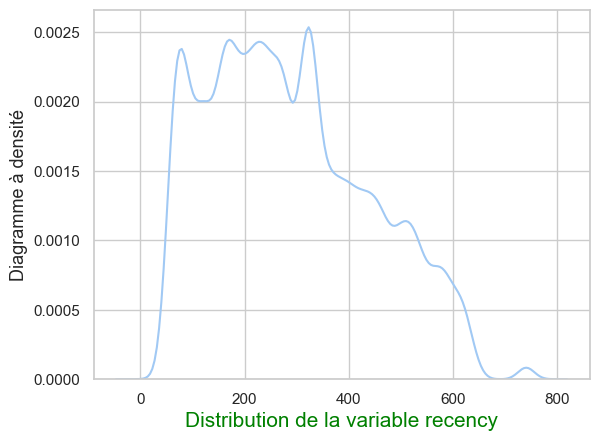

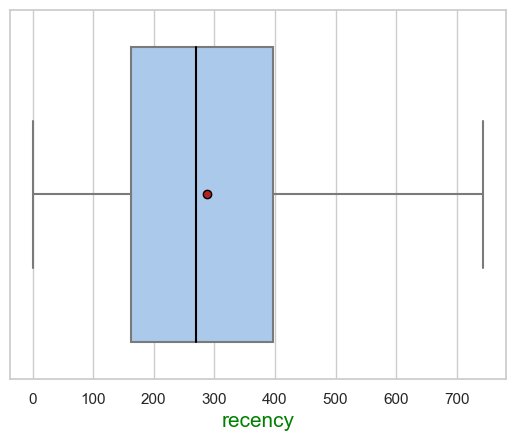

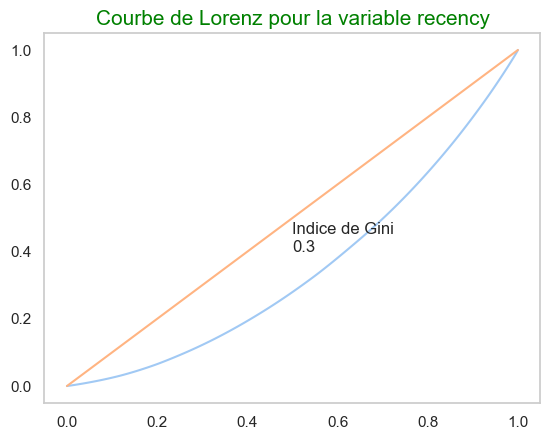

-------------------------------------------------------------------------------
Analyse de la variable frequency
-----
Moyenne : 1.03
Médiane : 1.0
Mode : 0    1.0
Name: frequency, dtype: float64
Variance : 0.05
Ecart-type : 0.21
Skewness : 11.87
Kurtosis : 421.93


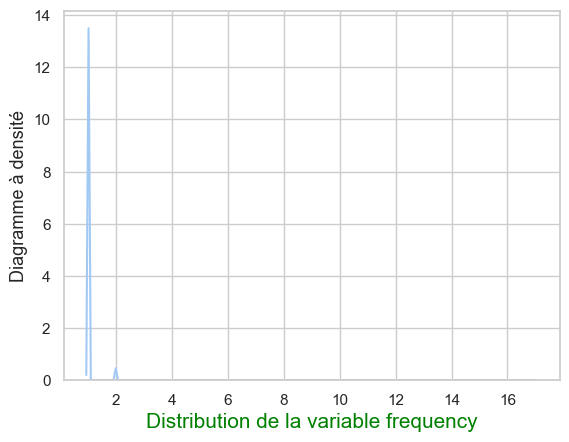

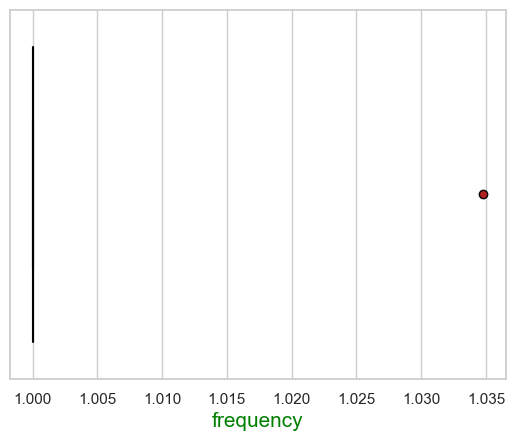

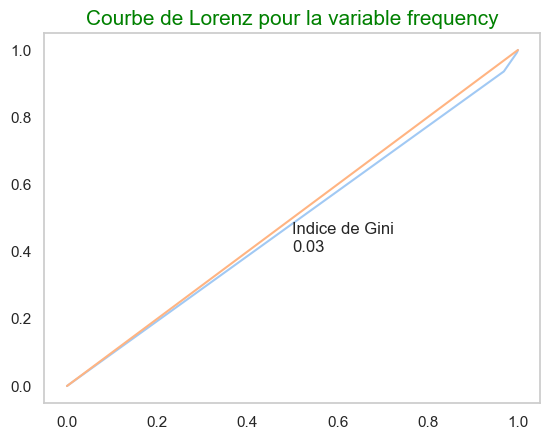

-------------------------------------------------------------------------------
Analyse de la variable monetary
-----
Moyenne : 163.85
Médiane : 106.29
Mode : 0    77.57
Name: monetary, dtype: float64
Variance : 52869.2
Ecart-type : 229.93
Skewness : 9.55
Kurtosis : 248.86


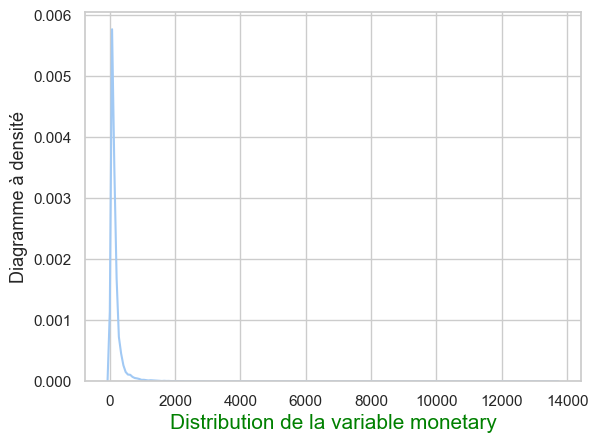

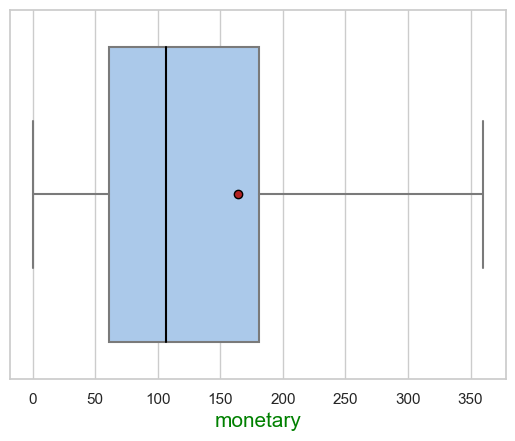

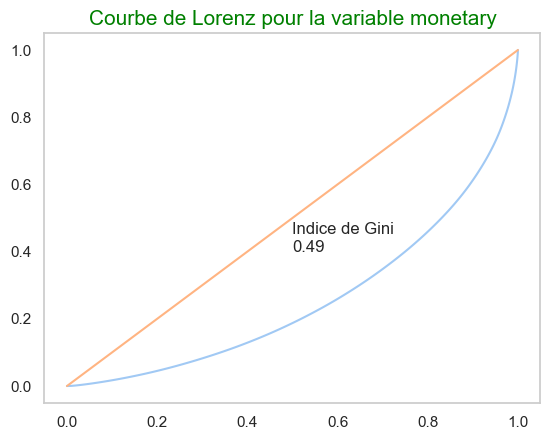

-------------------------------------------------------------------------------
Analyse de la variable review_score
-----
Moyenne : 4.08
Médiane : 5.0
Mode : 0    5.0
Name: review_score, dtype: float64
Variance : 1.8
Ecart-type : 1.34
Skewness : -1.35
Kurtosis : 0.5


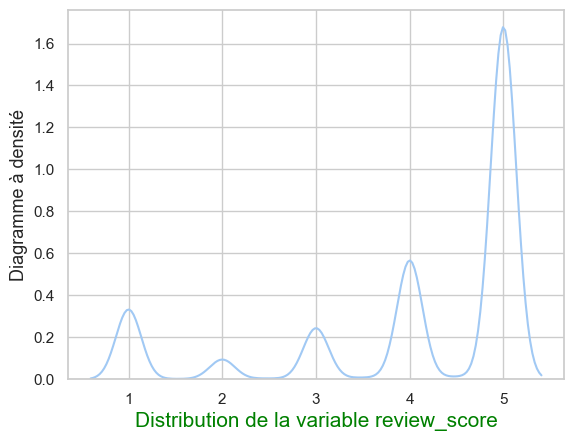

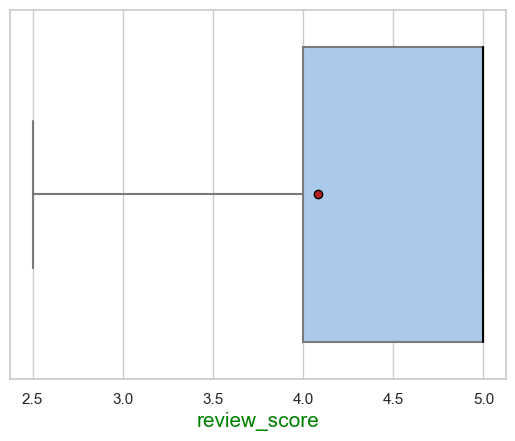

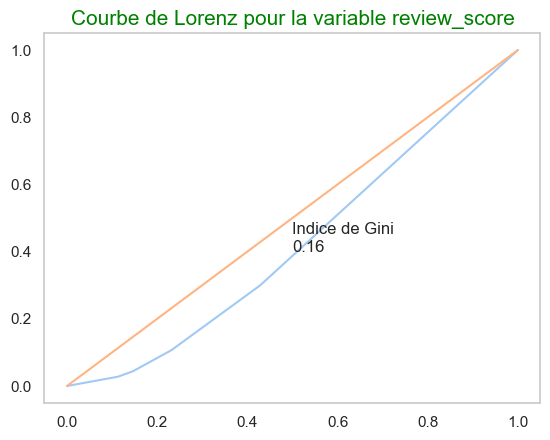

-------------------------------------------------------------------------------
Analyse de la variable delivery
-----
Moyenne : 12.18
Médiane : 10.0
Mode : 0    7.0
Name: delivery, dtype: float64
Variance : 90.25
Ecart-type : 9.5
Skewness : 3.84
Kurtosis : 39.97


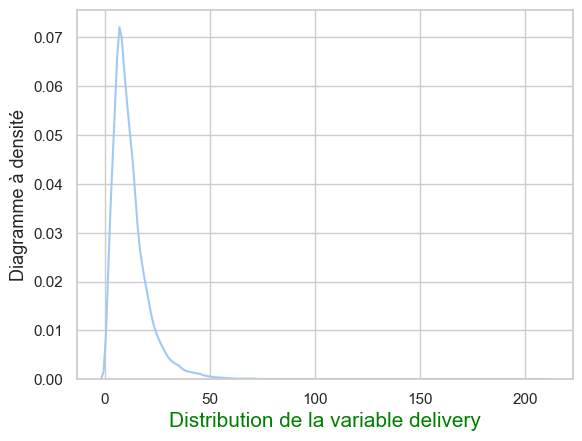

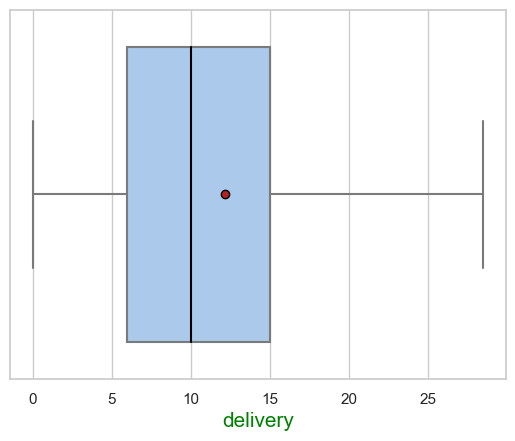

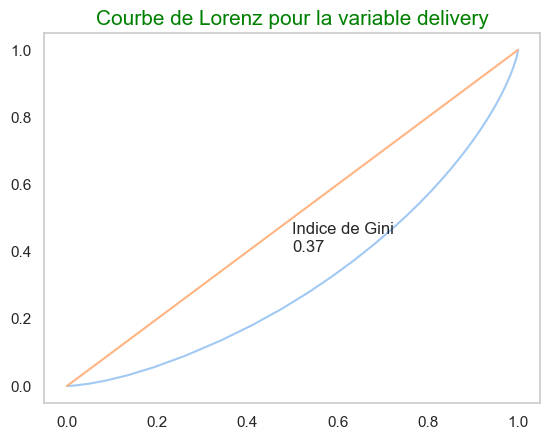

-------------------------------------------------------------------------------
Analyse de la variable advance
-----
Moyenne : 10.81
Médiane : 11.0
Mode : 0    13.0
Name: advance, dtype: float64
Variance : 102.01
Ecart-type : 10.1
Skewness : -2.06
Kurtosis : 28.76


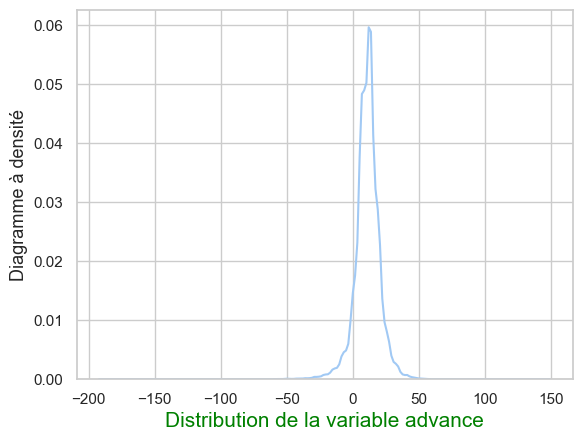

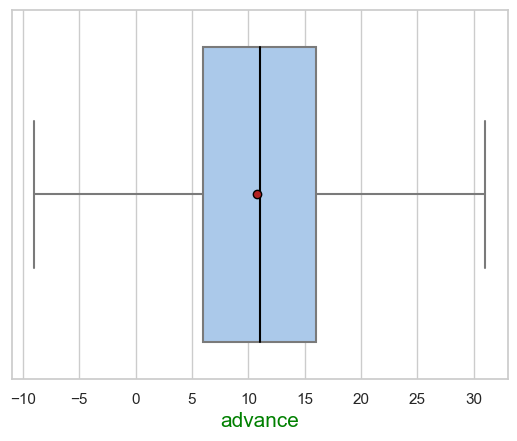

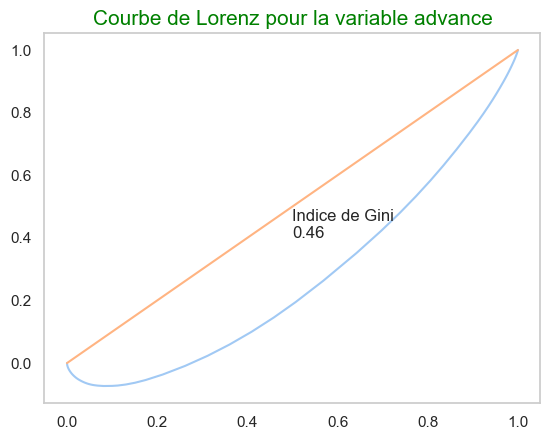

In [35]:
for col in df.columns:
    quantitative_feature_analysis(df, col)

## Analyse en Composantes Principales
### Transformation en array numpy

In [36]:
X = df.values
print(X.shape)

(96019, 6)


### Standardisation

In [37]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### Calcul des composantes principales

In [38]:
pca = decomposition.PCA(n_components=6)
pca.fit(X_scaled)

PCA(n_components=6)

### Pourcentage de variance expliquée & scree plot

In [39]:
scree = (pca.explained_variance_ratio_*100).round(2)
print('Pourcentage de variance expliquée :\n', scree)
scree_cum = scree.cumsum().round()
print('\nLes 4 premières composantes captent plus de 80% de la variance :\n', scree_cum)

Pourcentage de variance expliquée :
 [30.51 18.82 17.31 14.58 12.95  5.84]

Les 4 premières composantes captent plus de 80% de la variance :
 [ 31.  49.  67.  81.  94. 100.]


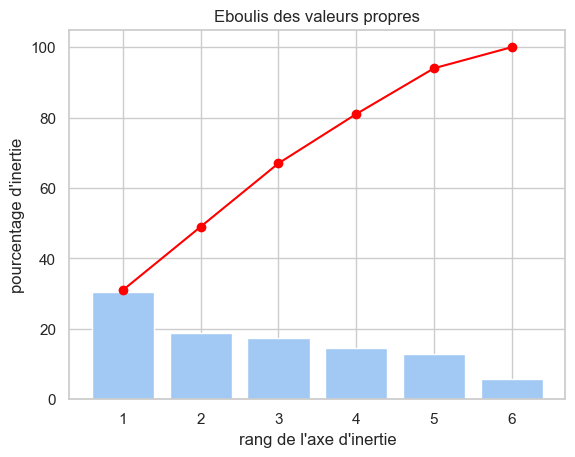

In [40]:
plt.bar(range(1, 7), scree)
plt.plot(range(1, 7), scree_cum, c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

Voici la représentation des clients sur le premier plan :

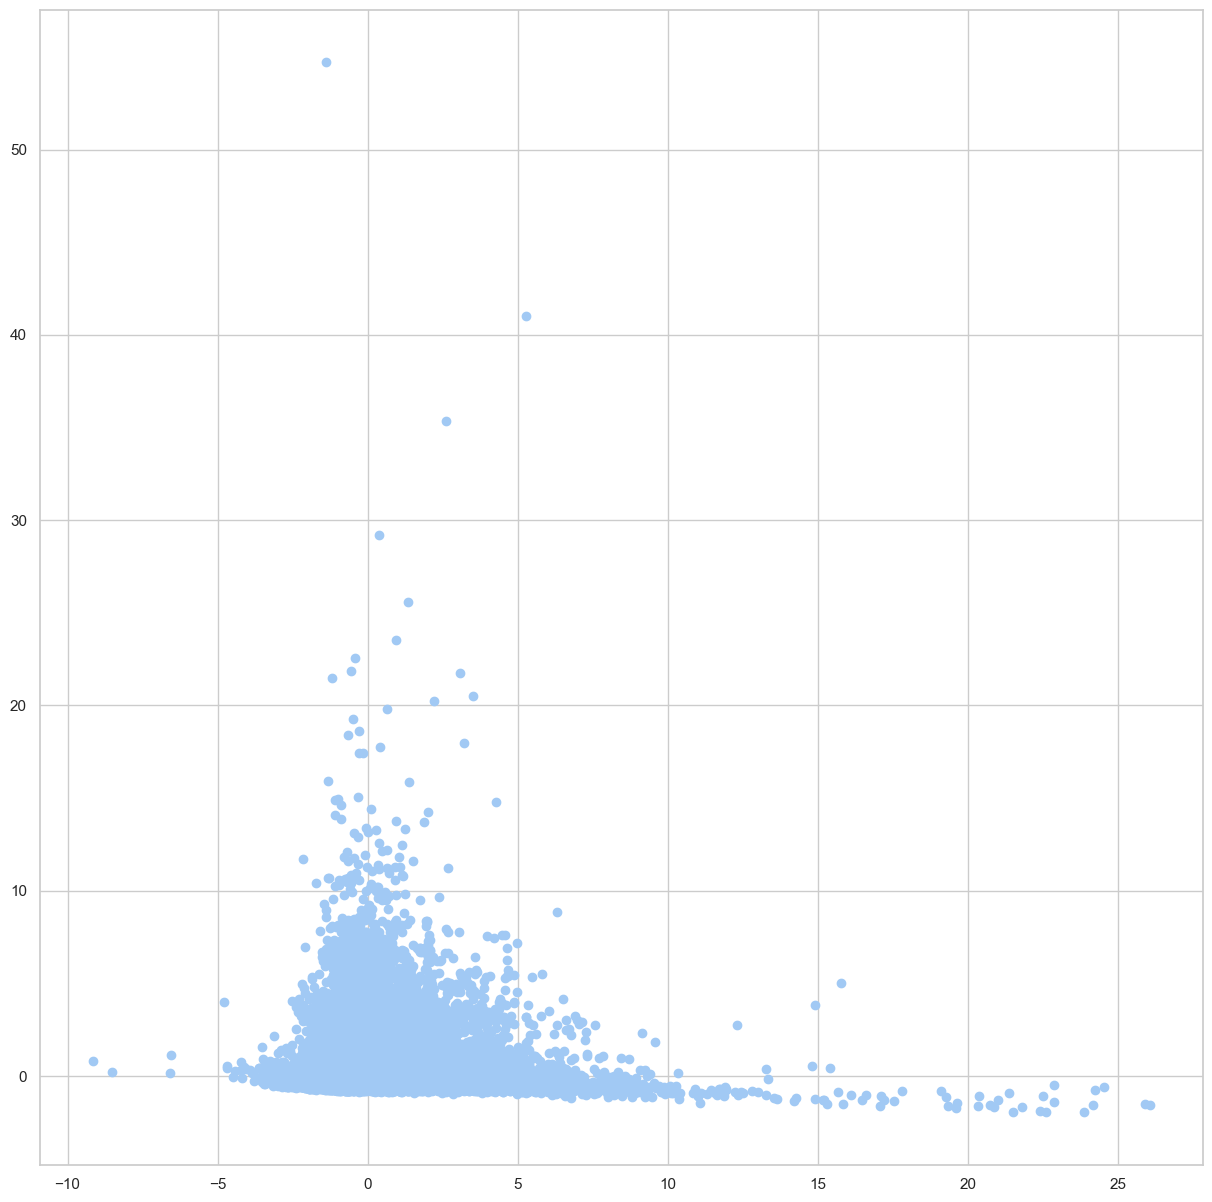

In [41]:
X_projected = pca.transform(X_scaled)
fig = plt.figure(figsize=(15, 15))
plt.scatter(X_projected[:, 0], X_projected[:, 1])

### Contribution de chaque variable aux composantes principales
Pour le cercle des corrélations, j'utilise la fonction suivante :

In [42]:
def correlation_graph(pca,
                      x_y,
                      features):
    """ Display the correlation graph

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : our PCA which has been fitted
    x_y : list or tuple : couple of x,y of plans to show, for instance [0,1] to get F1, F2
    features : list or tuple : features' list to draw
    """

    # Extract x and y
    x, y = x_y

    # Graph's size (in inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # For each component :
    for i in range(0, pca.components_.shape[1]):

        # Arrows
        ax.arrow(0, 0,
                 pca.components_[x, i],
                 pca.components_[y, i],
                 head_width=0.07,
                 head_length=0.07,
                 width=0.02, )

        # labels
        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i] + 0.05,
                 features[i])

    # Perpendicular lines
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Axes' names, with inertia's explained pourcentage
    plt.xlabel('F{} ({}%)'.format(
        x+1, round(100*pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('F{} ({}%)'.format(
        y+1, round(100*pca.explained_variance_ratio_[y], 1)))

    # Title
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Circle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes and display
    plt.axis('equal')
    plt.show(block=False)

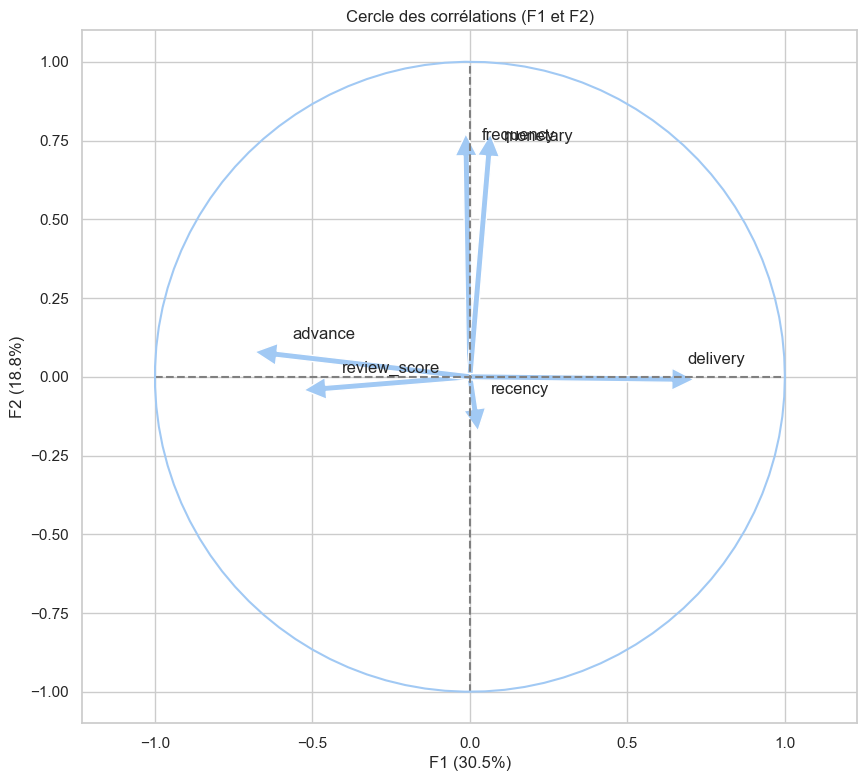

In [43]:
correlation_graph(pca, (0, 1), df.columns)

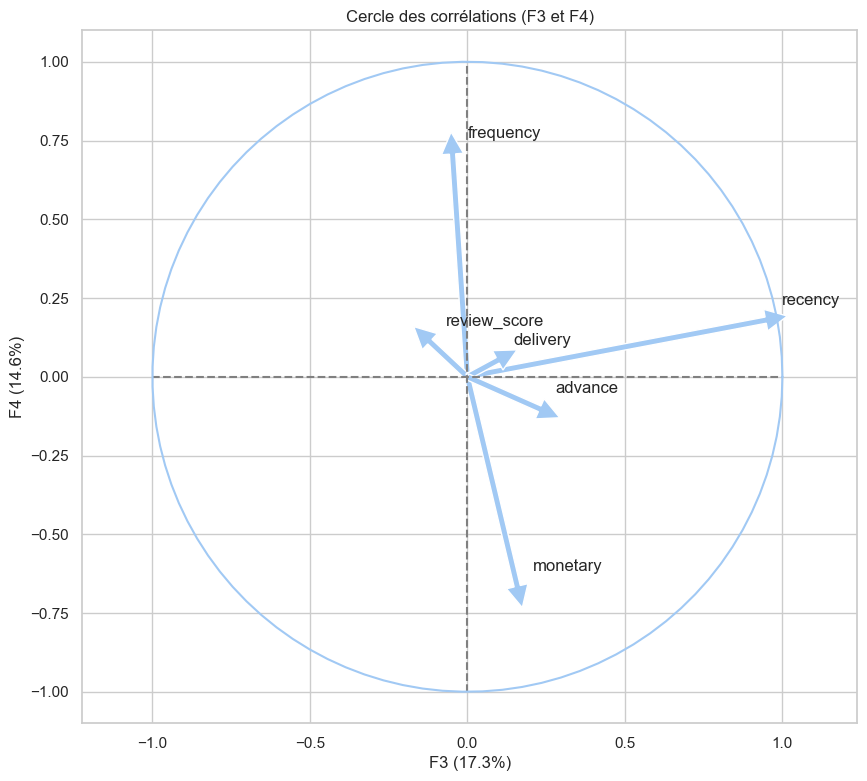

In [44]:
correlation_graph(pca, (2, 3), df.columns)

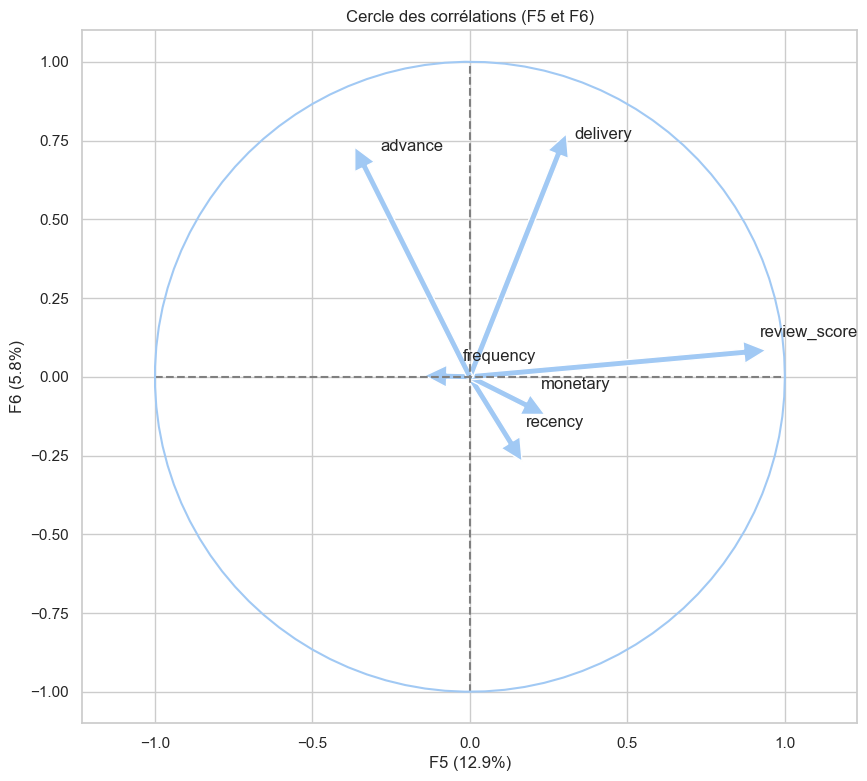

In [45]:
correlation_graph(pca, (4, 5), df.columns)

In [46]:
print(abs(pca.components_))

[[0.01540544 0.01169947 0.05926588 0.45723211 0.64114169 0.61317981]
 [0.10310413 0.70156266 0.70050017 0.03686724 0.00773506 0.07113265]
 [0.94693528 0.04720115 0.15814437 0.11916807 0.09617801 0.22940082]
 [0.17970231 0.70712687 0.66497005 0.11138997 0.05208798 0.10184606]
 [0.12901135 0.0735762  0.17549449 0.87003349 0.2801992  0.33417726]
 [0.20858795 0.00177137 0.08828327 0.07754082 0.7059763  0.66654248]]


## Export du dataframe pour essais de clustering

In [47]:
df.to_csv("essais.csv", sep=',', index=False)